<a href="https://colab.research.google.com/github/jtneumann/MLwork/blob/master/fastai/ml1/titanticTest2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q fastai==0.7.0
!pip install -q pandas==0.23.4

    100% |████████████████████████████████| 122kB 3.8MB/s 
    100% |████████████████████████████████| 1.5MB 14.4MB/s 
    100% |████████████████████████████████| 496.4MB 38kB/s 
    100% |████████████████████████████████| 3.6MB 4.0MB/s 
    100% |████████████████████████████████| 61kB 20.5MB/s 
    100% |████████████████████████████████| 12.4MB 2.6MB/s 
    100% |████████████████████████████████| 81kB 25.0MB/s 
mizani 0.5.3 has requirement pandas>=0.23.4, but you'll have pandas 0.22.0 which is incompatible.
plotnine 0.5.1 has requirement pandas>=0.23.4, but you'll have pandas 0.22.0 which is incompatible.
    100% |████████████████████████████████| 8.9MB 4.4MB/s 


    100% |████████████████████████████████| 8.9MB 1.6MB/s 


In [3]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
!ls

sample_data  test.csv  train.csv


In [0]:
import pandas as pd
df_raw = pd.read_csv('train.csv', low_memory=False)

In [0]:
train_cats(df_raw)

  ** proc_df** takes a data frame df and splits off the response variable, and
    changes the df into an entirely numeric dataframe. For each column of df 
    which is not in skip_flds nor in ignore_flds, na values are replaced by the
    median value of the column.
    Parameters:

In [0]:
df, y, nas = proc_df(df_raw, 'Survived')



In [115]:
df.tail()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_na
886,887,2,549,2,27.0,0,0,102,13.00,0,3,False
887,888,1,304,1,19.0,0,0,15,30.00,31,3,False
888,889,3,414,1,28.0,1,2,676,23.45,0,3,True
889,890,1,82,2,26.0,0,0,9,30.00,61,1,False
890,891,3,221,2,32.0,0,0,467,7.75,0,2,False


In [116]:
m=RandomForestClassifier(n_jobs=-1)
m.fit(df, y)
m.score(df,y)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9854096520763187

In [117]:

def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 562  # same as Kaggle's test set size
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape

((329, 12), (329,), (562, 12))

In [0]:

def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [119]:
m = RandomForestClassifier(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 24.7 ms, sys: 4.45 ms, total: 29.1 ms
Wall time: 111 ms
[0.0, 0.46015624763985646, 1.0, 0.7882562277580071]


In [120]:
m = RandomForestClassifier(n_estimators=60, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.0, 0.4363386976589781, 1.0, 0.8096085409252669]


In [121]:
m = RandomForestClassifier(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[0.0, 0.4464171325428248, 1.0, 0.800711743772242, 0.7264437689969605]


In [122]:
m = RandomForestClassifier(n_estimators=100, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.0, 0.4484056374069833, 1.0, 0.798932384341637, 0.7629179331306991]


In [123]:
m = RandomForestClassifier(n_estimators=10, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[0.055131784641997125, 0.4363386976589781, 0.9969604863221885, 0.8096085409252669, 0.6838905775075987]


In [124]:

preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:,0], np.mean(preds[:,0]), y_valid[0]

(array([1., 1., 1., 1., 1., 0., 1., 1., 1., 1.]), 0.9, 1)

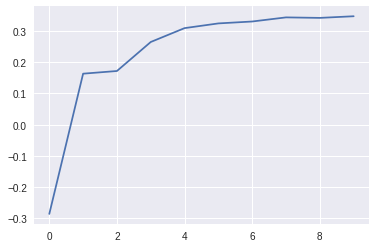

In [125]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(10)]);

In [126]:
m = RandomForestClassifier(n_estimators=8, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[0.055131784641997125, 0.46015624763985646, 0.9969604863221885, 0.7882562277580071, 0.6534954407294833]


In [133]:
m = RandomForestClassifier(n_estimators=100, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.0, 0.4659204336942176, 1.0, 0.7829181494661922]


In [134]:
X_train, X_valid = split_vals(df, n_trn)
m = RandomForestClassifier(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[0.18285144368018277, 0.4582187390443432, 0.9665653495440729, 0.7900355871886121, 0.7416413373860182]


In [136]:
fi=rf_feat_importance(m,df); 
fi

,cols,imp
3,Sex,0.386554
2,Name,0.133169
7,Ticket,0.093276
4,Age,0.092373
0,PassengerId,0.082496
8,Fare,0.071183
9,Cabin,0.047360
1,Pclass,0.044361
5,SibSp,0.023436
10,Embarked,0.017700


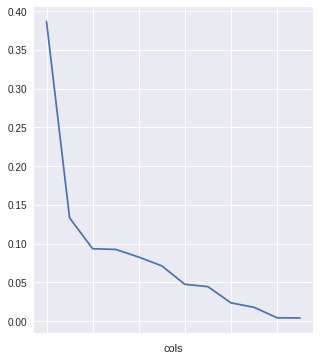

In [137]:
fi.plot('cols','imp',figsize=(5,6),legend=False)

In [0]:
features=['Embarked']

In [0]:
df.drop(['Embarked'], axis=1, inplace=True)

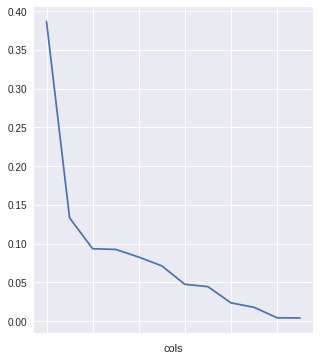

In [145]:
fi.plot('cols','imp',figsize=(5,6),legend=False)

In [0]:
X_train, X_valid = split_vals(df, n_trn)

In [147]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Ticket,Fare,Cabin
0,1,3,109,2,22.0,1,524,7.2500,0
1,2,1,191,1,38.0,1,597,71.2833,82
2,3,3,354,1,26.0,0,670,7.9250,0
3,4,1,273,1,35.0,1,50,53.1000,56
4,5,3,16,2,35.0,0,473,8.0500,0


In [148]:
m = RandomForestClassifier(n_estimators=100, n_jobs=-1, min_samples_leaf=3,oob_score=True, random_state=1)
m.fit(X_train,y_train)
print_score(m)

[0.2135244837651487, 0.42810515221416473, 0.9544072948328267, 0.8167259786476868, 0.7750759878419453]


Final Model

In [149]:
!ls

sample_data  test.csv  tmp  train.csv


In [151]:
df_test=pd.read_csv('./test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [0]:
train_cats(df_test)

In [0]:
df_test, _, nas = proc_df(df_test)

In [154]:
df_test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_na,Fare_na
0,892,3,207,2,34.5,0,0,153,7.8292,0,2,False,False
1,893,3,404,1,47.0,1,0,222,7.0000,0,3,False,False
2,894,2,270,2,62.0,0,0,74,9.6875,0,2,False,False
3,895,3,409,2,27.0,0,0,148,8.6625,0,3,False,False
4,896,3,179,1,22.0,1,1,139,12.2875,0,3,False,False


In [0]:
features=['Embarked', 'Age_na', 'Fare_na']

In [0]:
df_test.drop(features, axis=1, inplace=True)

In [158]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
0,892,3,207,2,34.5,0,0,153,7.8292,0
1,893,3,404,1,47.0,1,0,222,7.0000,0
2,894,2,270,2,62.0,0,0,74,9.6875,0
3,895,3,409,2,27.0,0,0,148,8.6625,0
4,896,3,179,1,22.0,1,1,139,12.2875,0


In [0]:
df_test.drop(['Parch'], axis=1, inplace=True)

In [162]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Ticket,Fare,Cabin
0,892,3,207,2,34.5,0,153,7.8292,0
1,893,3,404,1,47.0,1,222,7.0000,0
2,894,2,270,2,62.0,0,74,9.6875,0
3,895,3,409,2,27.0,0,148,8.6625,0
4,896,3,179,1,22.0,1,139,12.2875,0


In [0]:
survived = m.predict(df_test)

In [164]:
survived

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 

In [165]:
df_test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Ticket,Fare,Cabin
0,892,3,207,2,34.5,0,153,7.8292,0
1,893,3,404,1,47.0,1,222,7.0000,0
2,894,2,270,2,62.0,0,74,9.6875,0
3,895,3,409,2,27.0,0,148,8.6625,0
4,896,3,179,1,22.0,1,139,12.2875,0


In [0]:
features_to_drop = ['Pclass','Name','Sex','Age','SibSp','Ticket', 'Fare','Cabin']

In [0]:
df_test.drop(features_to_drop, axis=1, inplace=True)

In [168]:
df_test.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [0]:
df_test['Survived'] = survived

In [171]:
df_test.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [172]:
df_test

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [0]:
df_test.to_csv('tmp/test1.csv', index=False)